In [1]:
#!/usr/bin/python3.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.signal import find_peaks
# import tensorflow as tf
from sklearn.model_selection import train_test_split


%matplotlib notebook

In [2]:
# ================= CONSTANTS =================
PMT_PULSE_LENGTH = 1500  # Sample lenght of a typical pulse
SAMPLES_BEFORE_PEAK = 4  # Samples to store before peak detection. MUST BE SMALLER THAN 8

In [3]:
df=pd.read_csv("/mnt/hdd500/cernbox/Co60_v4_t50_s65534_hv2000/20210826_split/20210826_120431/Co60_v4_t50_joined.csv", index_col=0)

In [4]:
df

TBP:71430  TBP:65988  TBP:66534  TBP:74449  TBP:65811  TBP:73133  \
0            137        137        137        137        137        138   
1            138        137        137        136        137        137   
2            137        137        138        137        137        138   
3            138        137        137        136        137        137   
4            137        138        137        137        137        138   
...          ...        ...        ...        ...        ...        ...   
65529        137        137        138        138        137        137   
65530        137        137        137        137        137        137   
65531        136        137        137        137        136        138   
65532        137        137        137        110        137        137   
65533        137        137        137        116        137        136   

       TBP:72392  TBP:110192  TBP:71583  TBP:67636  ...  TBP:66889  TBP:99948  \
0            137         138        137        137  ...        137        137   
1            137         137        137        137  ...        137        138   
2            138         137        137        137  ...        137        137   
3            137         136        138        137  ...        137        137   
4            138         138        137        138  ...        138        138   
...          ...         ...        ...        ...  ...        ...        ...   
65529        137         137        137        137  ...        137        138   
65530        137         138        137        137  ...        137        137   
65531        137         137        137        137  ...        137        137   
65532        138         137        137        137  ...        137        138   
65533        136         137        138        136  ...        137        137   

       TBP:77707  TBP:69304  TBP:70035  TBP:75789  TBP:69645  TBP:79530  \
0            137        137        138        136        136        137   
1            137        137        137        138        137        137   
2            137        137        137        138        138        137   
3            137        137        137        137        137        137   
4            137        138        137        137        137        138   
...          ...        ...        ...        ...        ...        ...   
65529        136        138        137        137        137        137   
65530        138        137        137        137        137        137   
65531        137        137        137        137        137        137   
65532        137        137        137        137        137        138   
65533        137        137        137        137        137        138   

       TBP:72782  TBP:66327  
0            137        138  
1            138        137  
2            137        137  
3            138        137  
4            137        137  
...          ...        ...  
65529        137        137  
65530        137        137  
65531        138        138  
65532        137        137  
65533        137        137  

[65534 rows x 8025 columns]

In [9]:
df2=df.iloc[:PMT_PULSE_LENGTH].copy()
df2=(df2-np.mean(df2))/np.std(df2)
df2

TBP:65554  TBP:67394  TBP:65550  TBP:66049  TBP:65546  TBP:71011  \
0     -0.164680   0.665322   0.462657   0.438011   0.007296   0.330257   
1     -0.164680   0.665322  -0.012350   0.288909   0.007296  -0.039986   
2     -2.246304   0.665322   0.462657   0.363460   0.226167   0.330257   
3     -2.246304  -0.577496  -0.012350   0.363460   0.226167  -0.039986   
4     -1.552429  -0.577496   0.462657   0.363460   0.007296   0.330257   
...         ...        ...        ...        ...        ...        ...   
1495  -2.246304  -0.577496  -0.012350  -2.842226   0.226167  -0.039986   
1496  -0.164680   0.665322   0.462657  -2.767675   0.445037   0.330257   
1497  -0.164680  -0.577496  -0.012350  -2.842226   0.226167  -0.039986   
1498  -0.164680  -0.577496  -0.012350  -2.618573   0.445037   0.330257   
1499  -0.164680  -0.577496  -0.012350  -2.469471   0.226167  -0.039986   

      TBP:66685  TBP:65669  TBP:65829  TBP:65728  ...  TBP:68264  TBP:67051  \
0      1.382422   0.648611   0.516855   0.182755  ...  -0.455777   0.592662   
1     -0.268560  -0.333141  -0.248478   0.040717  ...  -0.455777   0.556497   
2      0.556931  -0.333141   0.516855   0.040717  ...   0.676119   0.592662   
3     -0.268560  -0.333141  -0.248478   0.040717  ...  -0.455777   0.556497   
4     -0.268560  -0.333141   0.516855   0.182755  ...  -0.455777   0.592662   
...         ...        ...        ...        ...  ...        ...        ...   
1495  -0.268560  -0.333141  -0.248478   0.040717  ...  -0.455777   0.556497   
1496  -0.268560  -0.333141  -0.248478   0.182755  ...   0.676119   0.592662   
1497  -0.268560  -0.333141  -0.248478   0.040717  ...   0.676119   0.556497   
1498   0.556931   0.648611   0.516855   0.040717  ...   0.676119   0.556497   
1499  -0.268560   0.648611  -0.248478   0.040717  ...  -0.455777   0.556497   

      TBP:67142  TBP:66541  TBP:65999  TBP:69566  TBP:65920  TBP:67815  \
0     -0.435743   0.524048   0.553968   0.516111   0.678410   0.740046   
1     -0.435743  -0.219634  -0.366245  -0.357666  -0.477971  -0.486550   
2      0.657258   0.524048   0.553968   0.516111   0.678410   0.740046   
3     -0.435743  -0.219634  -0.366245  -0.357666  -0.477971  -0.486550   
4      0.657258   0.524048   0.553968  -0.357666  -0.477971   0.740046   
...         ...        ...        ...        ...        ...        ...   
1495  -0.435743   0.524048  -0.366245  -0.357666  -0.477971  -0.486550   
1496   0.657258   0.524048   0.553968   0.516111   0.678410   0.740046   
1497  -0.435743  -0.219634  -0.366245  -0.357666  -0.477971  -0.486550   
1498  -0.435743  -0.219634   0.553968   0.516111  -0.477971   0.740046   
1499  -0.435743  -0.219634  -0.366245  -0.357666  -0.477971  -0.486550   

      TBP:78078  TBP:68424  
0      0.526243   0.456877  
1      0.526243   0.311065  
2     -0.263121   0.456877  
3     -0.263121   0.311065  
4      0.526243   0.311065  
...         ...        ...  
1495  -0.263121   0.311065  
1496  -0.263121   0.456877  
1497  -0.263121   0.311065  
1498   0.526243   0.456877  
1499  -0.263121   0.311065  

[1500 rows x 1187 columns]

<IPython.core.display.Javascript object>


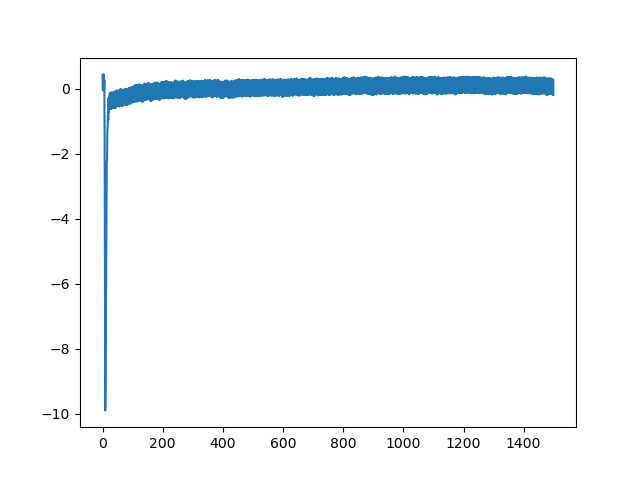

In [10]:
%matplotlib notebook
mod=np.mean(df2.T)
plt.plot(mod)

# FIR Integrated

In [6]:
def pkdetect(x, thr=100, pkh=10):
    peak=[]
    lmax=0
    imax=0
    count=0
    for i in range(1,len(x)):
        if x[i] <= thr:
            pass
        elif x[i] > lmax:
            imax=i
            lmax=x[i]
        elif ((lmax-x[i-1]) > pkh) and (x[i]-x[i-1])>0:
            peak.append(imax)
            lmax=0
        else:
            pass
            
    return peak

In [40]:
thr=1000
pkh=100000
%matplotlib notebook      
pkamp=[]
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    intg=np.convolve(fir,np.full(1000,1))
    peak=pkdetect(intg, thr, pkh)
    pkamp=np.append(pkamp,intg[peak])
plt.plot(intg)
plt.plot(peak,intg[peak],".")
plt.show()
# sns.histplot(data=pkamp, kde=True)

NameError: name 'mod' is not defined

In [ ]:
%matplotlib notebook
# sns.histplot(data=pkamp, kde=True)
plt.hist(pkamp)
plt.show()

In [ ]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Integrated_Co60_mod3.csv")
df2

# Only FIR

<IPython.core.display.Javascript object>


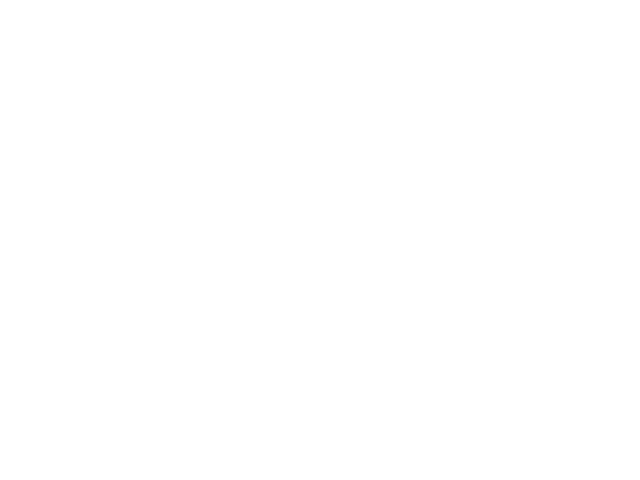

In [13]:
thr=100
pkh=1000
%matplotlib notebook      
pkamp=[]
# for c in df.columns[:10]:
for c in df.columns[:]:
    x=df[c].to_numpy()
    fir=np.convolve(x,np.flip(mod), "valid")
    peak=pkdetect(fir, thr, pkh)
    pkamp=np.append(pkamp,fir[peak])
plt.plot(fir)
plt.plot(peak,fir[peak],".")
plt.plot(x[10:])
plt.plot(peak, x[10:][peak], ".")
# sns.histplot(data=pkamp, kde=True)

In [14]:
df2=pd.DataFrame(pkamp, columns=["Co60"])
df2.to_csv("../FIR_Co60_mod3.csv")
df2

Co60
0        877.152152
1        879.490841
2       9201.530556
3       8611.456360
4       6744.568687
...             ...
157189  5118.787171
157190  4011.369417
157191  4136.388659
157192  3405.485836
157193  3523.288909

[157194 rows x 1 columns]

<IPython.core.display.Javascript object>


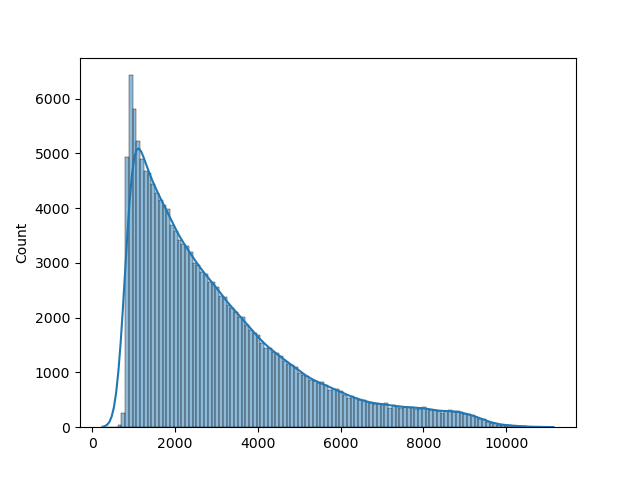

In [15]:
%matplotlib notebook
sns.histplot(data=pkamp, kde=True)
plt.show()

<IPython.core.display.Javascript object>


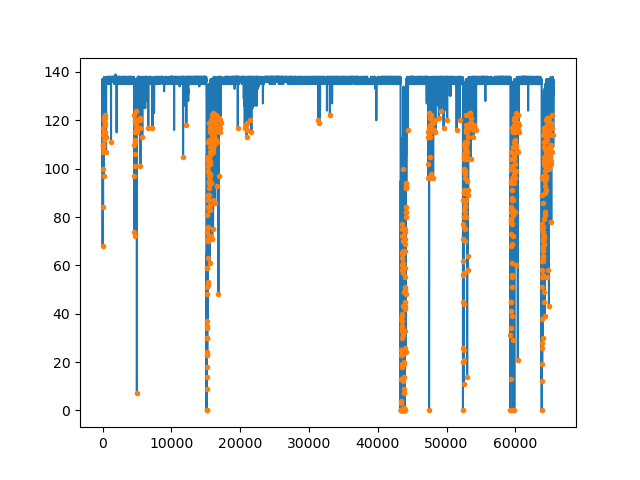

In [16]:
%matplotlib notebook
data=max(x)-x
# plt.plot(data)
xpeak=pkdetect(data,10, 10)
plt.plot(x)
plt.plot(xpeak, x[xpeak],".")
plt.show()

In [17]:
xpeak

[10,
 35,
 51,
 63,
 76,
 81,
 103,
 121,
 127,
 131,
 157,
 189,
 196,
 222,
 228,
 232,
 259,
 277,
 286,
 292,
 301,
 326,
 357,
 367,
 432,
 508,
 1230,
 4586,
 4594,
 4613,
 4622,
 4645,
 4657,
 4669,
 4693,
 4700,
 4749,
 4767,
 4777,
 4817,
 4834,
 4875,
 4916,
 4989,
 5015,
 5263,
 5389,
 5411,
 5433,
 5505,
 5775,
 6643,
 7255,
 11704,
 12177,
 15117,
 15120,
 15124,
 15128,
 15136,
 15141,
 15148,
 15154,
 15163,
 15178,
 15186,
 15190,
 15198,
 15202,
 15209,
 15213,
 15221,
 15231,
 15243,
 15257,
 15271,
 15286,
 15296,
 15306,
 15315,
 15327,
 15334,
 15341,
 15351,
 15358,
 15362,
 15367,
 15377,
 15387,
 15394,
 15408,
 15419,
 15431,
 15443,
 15457,
 15474,
 15487,
 15504,
 15514,
 15525,
 15529,
 15539,
 15555,
 15572,
 15583,
 15596,
 15600,
 15603,
 15609,
 15614,
 15624,
 15645,
 15649,
 15661,
 15671,
 15685,
 15707,
 15730,
 15751,
 15779,
 15782,
 15788,
 15799,
 15826,
 15842,
 15855,
 15867,
 15898,
 15910,
 15923,
 15938,
 15951,
 15979,
 15986,
 15992,
 1600

In [7]:
#Isolating individual pulses within a trace

def isolatePulses(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
    
    return isolatedPulses
        

In [8]:
#Isolating individual pulses within a trace using multithreading

def isolatePulsesMP(singleTrace, peakIndexesList, pulseLength, samplesBeforePeak, queue):
    singleTrace = singleTrace.tolist()
    i = 0 #Input pulse index
    outputPulseIndex = 0
    diffFromLastPeak = pulseLength #In order to classify the first pulse as a valid event
    isolatedPulses = [] #Output variable (list of pulse samples) that stores each valid pulse
    
    #Be sure to slide along the whole trace, avoiding short pulses located at the end
    while ((i < len(peakIndexesList)) and (peakIndexesList[i] <= len(singleTrace) - pulseLength)):
        #print("Diff from last peak: " + str(diffFromLastPeak))
        if(diffFromLastPeak >= pulseLength):
            lowerPulseRange = peakIndexesList[i] - samplesBeforePeak #Be sure to record some samples before peak
            upperPulseRange = lowerPulseRange + pulseLength #Store the whole pulse
            isolatedPulses.append([])
            isolatedPulses[outputPulseIndex].extend(singleTrace[lowerPulseRange:upperPulseRange])
            #print("OutputPulseIndex: " + str(outputPulseIndex))
            outputPulseIndex += 1
            diffFromLastPeak = 0
        i += 1
        if i < len(peakIndexesList):
            diffFromLastPeak += peakIndexesList[i] - peakIndexesList[i-1] #Check if peaks are distant enough
            
        else:
            break
        
        queue.put(isolatedPulses[1:])
    
#     return isolatedPulses


In [9]:
#Dataframe with individual pulses
dfPulses = pd.DataFrame(columns = [0])

In [10]:
df[df.columns[1]]

0        137
1        137
2        137
3        137
4        138
        ... 
65529    137
65530    137
65531    137
65532    137
65533    137
Name: TBP:65988, Length: 65534, dtype: int64

In [11]:
nPulses = len(df.T)
#Pulses = 10
testList = []
pulseIdx = 0
for i in range(nPulses):
    testList.append([])
    thisTrace = df[df.columns[i]]
    peaksList = pkdetect(thisTrace, 10, 10)
    individualPulses = isolatePulses(thisTrace, peaksList, PMT_PULSE_LENGTH, SAMPLES_BEFORE_PEAK)[1:]
    #print("Individual pulses: " + str(individualPulses))
    print("Processing trace " + str(i + 1) + "/" + str(nPulses))
    for j in individualPulses:
        #print("j: " + str(j))
        dfPulses[pulseIdx] = j
        pulseIdx += 1

Processing trace 1/8025
Processing trace 2/8025
Processing trace 3/8025
Processing trace 4/8025
Processing trace 5/8025
Processing trace 6/8025
Processing trace 7/8025
Processing trace 8/8025
Processing trace 9/8025
Processing trace 10/8025
Processing trace 11/8025
Processing trace 12/8025
Processing trace 13/8025
Processing trace 14/8025
Processing trace 15/8025
Processing trace 16/8025
Processing trace 17/8025
Processing trace 18/8025
Processing trace 19/8025
Processing trace 20/8025
Processing trace 21/8025
Processing trace 22/8025
Processing trace 23/8025
Processing trace 24/8025
Processing trace 25/8025
Processing trace 26/8025
Processing trace 27/8025
Processing trace 28/8025
Processing trace 29/8025
Processing trace 30/8025
Processing trace 31/8025
Processing trace 32/8025
Processing trace 33/8025
Processing trace 34/8025
Processing trace 35/8025
Processing trace 36/8025
Processing trace 37/8025
Processing trace 38/8025
Processing trace 39/8025
Processing trace 40/8025
Processin

Processing trace 321/8025
Processing trace 322/8025
Processing trace 323/8025
Processing trace 324/8025
Processing trace 325/8025
Processing trace 326/8025
Processing trace 327/8025
Processing trace 328/8025
Processing trace 329/8025
Processing trace 330/8025
Processing trace 331/8025
Processing trace 332/8025
Processing trace 333/8025
Processing trace 334/8025
Processing trace 335/8025
Processing trace 336/8025
Processing trace 337/8025
Processing trace 338/8025
Processing trace 339/8025
Processing trace 340/8025
Processing trace 341/8025
Processing trace 342/8025
Processing trace 343/8025
Processing trace 344/8025
Processing trace 345/8025
Processing trace 346/8025
Processing trace 347/8025
Processing trace 348/8025
Processing trace 349/8025
Processing trace 350/8025
Processing trace 351/8025
Processing trace 352/8025
Processing trace 353/8025
Processing trace 354/8025
Processing trace 355/8025
Processing trace 356/8025
Processing trace 357/8025
Processing trace 358/8025
Processing t

Processing trace 637/8025
Processing trace 638/8025
Processing trace 639/8025
Processing trace 640/8025
Processing trace 641/8025
Processing trace 642/8025
Processing trace 643/8025
Processing trace 644/8025
Processing trace 645/8025
Processing trace 646/8025
Processing trace 647/8025
Processing trace 648/8025
Processing trace 649/8025
Processing trace 650/8025
Processing trace 651/8025
Processing trace 652/8025
Processing trace 653/8025
Processing trace 654/8025
Processing trace 655/8025
Processing trace 656/8025
Processing trace 657/8025
Processing trace 658/8025
Processing trace 659/8025
Processing trace 660/8025
Processing trace 661/8025
Processing trace 662/8025
Processing trace 663/8025
Processing trace 664/8025
Processing trace 665/8025
Processing trace 666/8025
Processing trace 667/8025
Processing trace 668/8025
Processing trace 669/8025
Processing trace 670/8025
Processing trace 671/8025
Processing trace 672/8025
Processing trace 673/8025
Processing trace 674/8025
Processing t

Processing trace 953/8025
Processing trace 954/8025
Processing trace 955/8025
Processing trace 956/8025
Processing trace 957/8025
Processing trace 958/8025
Processing trace 959/8025
Processing trace 960/8025
Processing trace 961/8025
Processing trace 962/8025
Processing trace 963/8025
Processing trace 964/8025
Processing trace 965/8025
Processing trace 966/8025
Processing trace 967/8025
Processing trace 968/8025
Processing trace 969/8025
Processing trace 970/8025
Processing trace 971/8025
Processing trace 972/8025
Processing trace 973/8025
Processing trace 974/8025
Processing trace 975/8025
Processing trace 976/8025
Processing trace 977/8025
Processing trace 978/8025
Processing trace 979/8025
Processing trace 980/8025
Processing trace 981/8025
Processing trace 982/8025
Processing trace 983/8025
Processing trace 984/8025
Processing trace 985/8025
Processing trace 986/8025
Processing trace 987/8025
Processing trace 988/8025
Processing trace 989/8025
Processing trace 990/8025
Processing t

Processing trace 1259/8025
Processing trace 1260/8025
Processing trace 1261/8025
Processing trace 1262/8025
Processing trace 1263/8025
Processing trace 1264/8025
Processing trace 1265/8025
Processing trace 1266/8025
Processing trace 1267/8025
Processing trace 1268/8025
Processing trace 1269/8025
Processing trace 1270/8025
Processing trace 1271/8025
Processing trace 1272/8025
Processing trace 1273/8025
Processing trace 1274/8025
Processing trace 1275/8025
Processing trace 1276/8025
Processing trace 1277/8025
Processing trace 1278/8025
Processing trace 1279/8025
Processing trace 1280/8025
Processing trace 1281/8025
Processing trace 1282/8025
Processing trace 1283/8025
Processing trace 1284/8025
Processing trace 1285/8025
Processing trace 1286/8025
Processing trace 1287/8025
Processing trace 1288/8025
Processing trace 1289/8025
Processing trace 1290/8025
Processing trace 1291/8025
Processing trace 1292/8025
Processing trace 1293/8025
Processing trace 1294/8025
Processing trace 1295/8025
P

Processing trace 1563/8025
Processing trace 1564/8025
Processing trace 1565/8025
Processing trace 1566/8025
Processing trace 1567/8025
Processing trace 1568/8025
Processing trace 1569/8025
Processing trace 1570/8025
Processing trace 1571/8025
Processing trace 1572/8025
Processing trace 1573/8025
Processing trace 1574/8025
Processing trace 1575/8025
Processing trace 1576/8025
Processing trace 1577/8025
Processing trace 1578/8025
Processing trace 1579/8025
Processing trace 1580/8025
Processing trace 1581/8025
Processing trace 1582/8025
Processing trace 1583/8025
Processing trace 1584/8025
Processing trace 1585/8025
Processing trace 1586/8025
Processing trace 1587/8025
Processing trace 1588/8025
Processing trace 1589/8025
Processing trace 1590/8025
Processing trace 1591/8025
Processing trace 1592/8025
Processing trace 1593/8025
Processing trace 1594/8025
Processing trace 1595/8025
Processing trace 1596/8025
Processing trace 1597/8025
Processing trace 1598/8025
Processing trace 1599/8025
P

Processing trace 1867/8025
Processing trace 1868/8025
Processing trace 1869/8025
Processing trace 1870/8025
Processing trace 1871/8025
Processing trace 1872/8025
Processing trace 1873/8025
Processing trace 1874/8025
Processing trace 1875/8025
Processing trace 1876/8025
Processing trace 1877/8025
Processing trace 1878/8025
Processing trace 1879/8025
Processing trace 1880/8025
Processing trace 1881/8025
Processing trace 1882/8025
Processing trace 1883/8025
Processing trace 1884/8025
Processing trace 1885/8025
Processing trace 1886/8025
Processing trace 1887/8025
Processing trace 1888/8025
Processing trace 1889/8025
Processing trace 1890/8025
Processing trace 1891/8025
Processing trace 1892/8025
Processing trace 1893/8025
Processing trace 1894/8025
Processing trace 1895/8025
Processing trace 1896/8025
Processing trace 1897/8025
Processing trace 1898/8025
Processing trace 1899/8025
Processing trace 1900/8025
Processing trace 1901/8025
Processing trace 1902/8025
Processing trace 1903/8025
P

Processing trace 2171/8025
Processing trace 2172/8025
Processing trace 2173/8025
Processing trace 2174/8025
Processing trace 2175/8025
Processing trace 2176/8025
Processing trace 2177/8025
Processing trace 2178/8025
Processing trace 2179/8025
Processing trace 2180/8025
Processing trace 2181/8025
Processing trace 2182/8025
Processing trace 2183/8025
Processing trace 2184/8025
Processing trace 2185/8025
Processing trace 2186/8025
Processing trace 2187/8025
Processing trace 2188/8025
Processing trace 2189/8025
Processing trace 2190/8025
Processing trace 2191/8025
Processing trace 2192/8025
Processing trace 2193/8025
Processing trace 2194/8025
Processing trace 2195/8025
Processing trace 2196/8025
Processing trace 2197/8025
Processing trace 2198/8025
Processing trace 2199/8025
Processing trace 2200/8025
Processing trace 2201/8025
Processing trace 2202/8025
Processing trace 2203/8025
Processing trace 2204/8025
Processing trace 2205/8025
Processing trace 2206/8025
Processing trace 2207/8025
P

Processing trace 2475/8025
Processing trace 2476/8025
Processing trace 2477/8025
Processing trace 2478/8025
Processing trace 2479/8025
Processing trace 2480/8025
Processing trace 2481/8025
Processing trace 2482/8025
Processing trace 2483/8025
Processing trace 2484/8025
Processing trace 2485/8025
Processing trace 2486/8025
Processing trace 2487/8025
Processing trace 2488/8025
Processing trace 2489/8025
Processing trace 2490/8025
Processing trace 2491/8025
Processing trace 2492/8025
Processing trace 2493/8025
Processing trace 2494/8025
Processing trace 2495/8025
Processing trace 2496/8025
Processing trace 2497/8025
Processing trace 2498/8025
Processing trace 2499/8025
Processing trace 2500/8025
Processing trace 2501/8025
Processing trace 2502/8025
Processing trace 2503/8025
Processing trace 2504/8025
Processing trace 2505/8025
Processing trace 2506/8025
Processing trace 2507/8025
Processing trace 2508/8025
Processing trace 2509/8025
Processing trace 2510/8025
Processing trace 2511/8025
P

Processing trace 2779/8025
Processing trace 2780/8025
Processing trace 2781/8025
Processing trace 2782/8025
Processing trace 2783/8025
Processing trace 2784/8025
Processing trace 2785/8025
Processing trace 2786/8025
Processing trace 2787/8025
Processing trace 2788/8025
Processing trace 2789/8025
Processing trace 2790/8025
Processing trace 2791/8025
Processing trace 2792/8025
Processing trace 2793/8025
Processing trace 2794/8025
Processing trace 2795/8025
Processing trace 2796/8025
Processing trace 2797/8025
Processing trace 2798/8025
Processing trace 2799/8025
Processing trace 2800/8025
Processing trace 2801/8025
Processing trace 2802/8025
Processing trace 2803/8025
Processing trace 2804/8025
Processing trace 2805/8025
Processing trace 2806/8025
Processing trace 2807/8025
Processing trace 2808/8025
Processing trace 2809/8025
Processing trace 2810/8025
Processing trace 2811/8025
Processing trace 2812/8025
Processing trace 2813/8025
Processing trace 2814/8025
Processing trace 2815/8025
P

Processing trace 3083/8025
Processing trace 3084/8025
Processing trace 3085/8025
Processing trace 3086/8025
Processing trace 3087/8025
Processing trace 3088/8025
Processing trace 3089/8025
Processing trace 3090/8025
Processing trace 3091/8025
Processing trace 3092/8025
Processing trace 3093/8025
Processing trace 3094/8025
Processing trace 3095/8025
Processing trace 3096/8025
Processing trace 3097/8025
Processing trace 3098/8025
Processing trace 3099/8025
Processing trace 3100/8025
Processing trace 3101/8025
Processing trace 3102/8025
Processing trace 3103/8025
Processing trace 3104/8025
Processing trace 3105/8025
Processing trace 3106/8025
Processing trace 3107/8025
Processing trace 3108/8025
Processing trace 3109/8025
Processing trace 3110/8025
Processing trace 3111/8025
Processing trace 3112/8025
Processing trace 3113/8025
Processing trace 3114/8025
Processing trace 3115/8025
Processing trace 3116/8025
Processing trace 3117/8025
Processing trace 3118/8025
Processing trace 3119/8025
P

Processing trace 3387/8025
Processing trace 3388/8025
Processing trace 3389/8025
Processing trace 3390/8025
Processing trace 3391/8025
Processing trace 3392/8025
Processing trace 3393/8025
Processing trace 3394/8025
Processing trace 3395/8025
Processing trace 3396/8025
Processing trace 3397/8025
Processing trace 3398/8025
Processing trace 3399/8025
Processing trace 3400/8025
Processing trace 3401/8025
Processing trace 3402/8025
Processing trace 3403/8025
Processing trace 3404/8025
Processing trace 3405/8025
Processing trace 3406/8025
Processing trace 3407/8025
Processing trace 3408/8025
Processing trace 3409/8025
Processing trace 3410/8025
Processing trace 3411/8025
Processing trace 3412/8025
Processing trace 3413/8025
Processing trace 3414/8025
Processing trace 3415/8025
Processing trace 3416/8025
Processing trace 3417/8025
Processing trace 3418/8025
Processing trace 3419/8025
Processing trace 3420/8025
Processing trace 3421/8025
Processing trace 3422/8025
Processing trace 3423/8025
P

Processing trace 3691/8025
Processing trace 3692/8025
Processing trace 3693/8025
Processing trace 3694/8025
Processing trace 3695/8025
Processing trace 3696/8025
Processing trace 3697/8025
Processing trace 3698/8025
Processing trace 3699/8025
Processing trace 3700/8025
Processing trace 3701/8025
Processing trace 3702/8025
Processing trace 3703/8025
Processing trace 3704/8025
Processing trace 3705/8025
Processing trace 3706/8025
Processing trace 3707/8025
Processing trace 3708/8025
Processing trace 3709/8025
Processing trace 3710/8025
Processing trace 3711/8025
Processing trace 3712/8025
Processing trace 3713/8025
Processing trace 3714/8025
Processing trace 3715/8025
Processing trace 3716/8025
Processing trace 3717/8025
Processing trace 3718/8025
Processing trace 3719/8025
Processing trace 3720/8025
Processing trace 3721/8025
Processing trace 3722/8025
Processing trace 3723/8025
Processing trace 3724/8025
Processing trace 3725/8025
Processing trace 3726/8025
Processing trace 3727/8025
P

Processing trace 3995/8025
Processing trace 3996/8025
Processing trace 3997/8025
Processing trace 3998/8025
Processing trace 3999/8025
Processing trace 4000/8025
Processing trace 4001/8025
Processing trace 4002/8025
Processing trace 4003/8025
Processing trace 4004/8025
Processing trace 4005/8025
Processing trace 4006/8025
Processing trace 4007/8025
Processing trace 4008/8025
Processing trace 4009/8025
Processing trace 4010/8025
Processing trace 4011/8025
Processing trace 4012/8025
Processing trace 4013/8025
Processing trace 4014/8025
Processing trace 4015/8025
Processing trace 4016/8025
Processing trace 4017/8025
Processing trace 4018/8025
Processing trace 4019/8025
Processing trace 4020/8025
Processing trace 4021/8025
Processing trace 4022/8025
Processing trace 4023/8025
Processing trace 4024/8025
Processing trace 4025/8025
Processing trace 4026/8025
Processing trace 4027/8025
Processing trace 4028/8025
Processing trace 4029/8025
Processing trace 4030/8025
Processing trace 4031/8025
P

Processing trace 4299/8025
Processing trace 4300/8025
Processing trace 4301/8025
Processing trace 4302/8025
Processing trace 4303/8025
Processing trace 4304/8025
Processing trace 4305/8025
Processing trace 4306/8025
Processing trace 4307/8025
Processing trace 4308/8025
Processing trace 4309/8025
Processing trace 4310/8025
Processing trace 4311/8025
Processing trace 4312/8025
Processing trace 4313/8025
Processing trace 4314/8025
Processing trace 4315/8025
Processing trace 4316/8025
Processing trace 4317/8025
Processing trace 4318/8025
Processing trace 4319/8025
Processing trace 4320/8025
Processing trace 4321/8025
Processing trace 4322/8025
Processing trace 4323/8025
Processing trace 4324/8025
Processing trace 4325/8025
Processing trace 4326/8025
Processing trace 4327/8025
Processing trace 4328/8025
Processing trace 4329/8025
Processing trace 4330/8025
Processing trace 4331/8025
Processing trace 4332/8025
Processing trace 4333/8025
Processing trace 4334/8025
Processing trace 4335/8025
P

Processing trace 4603/8025
Processing trace 4604/8025
Processing trace 4605/8025
Processing trace 4606/8025
Processing trace 4607/8025
Processing trace 4608/8025
Processing trace 4609/8025
Processing trace 4610/8025
Processing trace 4611/8025
Processing trace 4612/8025
Processing trace 4613/8025
Processing trace 4614/8025
Processing trace 4615/8025
Processing trace 4616/8025
Processing trace 4617/8025
Processing trace 4618/8025
Processing trace 4619/8025
Processing trace 4620/8025
Processing trace 4621/8025
Processing trace 4622/8025
Processing trace 4623/8025
Processing trace 4624/8025
Processing trace 4625/8025
Processing trace 4626/8025
Processing trace 4627/8025
Processing trace 4628/8025
Processing trace 4629/8025
Processing trace 4630/8025
Processing trace 4631/8025
Processing trace 4632/8025
Processing trace 4633/8025
Processing trace 4634/8025
Processing trace 4635/8025
Processing trace 4636/8025
Processing trace 4637/8025
Processing trace 4638/8025
Processing trace 4639/8025
P

Processing trace 4907/8025
Processing trace 4908/8025
Processing trace 4909/8025
Processing trace 4910/8025
Processing trace 4911/8025
Processing trace 4912/8025
Processing trace 4913/8025
Processing trace 4914/8025
Processing trace 4915/8025
Processing trace 4916/8025
Processing trace 4917/8025
Processing trace 4918/8025
Processing trace 4919/8025
Processing trace 4920/8025
Processing trace 4921/8025
Processing trace 4922/8025
Processing trace 4923/8025
Processing trace 4924/8025
Processing trace 4925/8025
Processing trace 4926/8025
Processing trace 4927/8025
Processing trace 4928/8025
Processing trace 4929/8025
Processing trace 4930/8025
Processing trace 4931/8025
Processing trace 4932/8025
Processing trace 4933/8025
Processing trace 4934/8025
Processing trace 4935/8025
Processing trace 4936/8025
Processing trace 4937/8025
Processing trace 4938/8025
Processing trace 4939/8025
Processing trace 4940/8025
Processing trace 4941/8025
Processing trace 4942/8025
Processing trace 4943/8025
P

Processing trace 5211/8025
Processing trace 5212/8025
Processing trace 5213/8025
Processing trace 5214/8025
Processing trace 5215/8025
Processing trace 5216/8025
Processing trace 5217/8025
Processing trace 5218/8025
Processing trace 5219/8025
Processing trace 5220/8025
Processing trace 5221/8025
Processing trace 5222/8025
Processing trace 5223/8025
Processing trace 5224/8025
Processing trace 5225/8025
Processing trace 5226/8025
Processing trace 5227/8025
Processing trace 5228/8025
Processing trace 5229/8025
Processing trace 5230/8025
Processing trace 5231/8025
Processing trace 5232/8025
Processing trace 5233/8025
Processing trace 5234/8025
Processing trace 5235/8025
Processing trace 5236/8025
Processing trace 5237/8025
Processing trace 5238/8025
Processing trace 5239/8025
Processing trace 5240/8025
Processing trace 5241/8025
Processing trace 5242/8025
Processing trace 5243/8025
Processing trace 5244/8025
Processing trace 5245/8025
Processing trace 5246/8025
Processing trace 5247/8025
P

Processing trace 5515/8025
Processing trace 5516/8025
Processing trace 5517/8025
Processing trace 5518/8025
Processing trace 5519/8025
Processing trace 5520/8025
Processing trace 5521/8025
Processing trace 5522/8025
Processing trace 5523/8025
Processing trace 5524/8025
Processing trace 5525/8025
Processing trace 5526/8025
Processing trace 5527/8025
Processing trace 5528/8025
Processing trace 5529/8025
Processing trace 5530/8025
Processing trace 5531/8025
Processing trace 5532/8025
Processing trace 5533/8025
Processing trace 5534/8025
Processing trace 5535/8025
Processing trace 5536/8025
Processing trace 5537/8025
Processing trace 5538/8025
Processing trace 5539/8025
Processing trace 5540/8025
Processing trace 5541/8025
Processing trace 5542/8025
Processing trace 5543/8025
Processing trace 5544/8025
Processing trace 5545/8025
Processing trace 5546/8025
Processing trace 5547/8025
Processing trace 5548/8025
Processing trace 5549/8025
Processing trace 5550/8025
Processing trace 5551/8025
P

Processing trace 5819/8025
Processing trace 5820/8025
Processing trace 5821/8025
Processing trace 5822/8025
Processing trace 5823/8025
Processing trace 5824/8025
Processing trace 5825/8025
Processing trace 5826/8025
Processing trace 5827/8025
Processing trace 5828/8025
Processing trace 5829/8025
Processing trace 5830/8025
Processing trace 5831/8025
Processing trace 5832/8025
Processing trace 5833/8025
Processing trace 5834/8025
Processing trace 5835/8025
Processing trace 5836/8025
Processing trace 5837/8025
Processing trace 5838/8025
Processing trace 5839/8025
Processing trace 5840/8025
Processing trace 5841/8025
Processing trace 5842/8025
Processing trace 5843/8025
Processing trace 5844/8025
Processing trace 5845/8025
Processing trace 5846/8025
Processing trace 5847/8025
Processing trace 5848/8025
Processing trace 5849/8025
Processing trace 5850/8025
Processing trace 5851/8025
Processing trace 5852/8025
Processing trace 5853/8025
Processing trace 5854/8025
Processing trace 5855/8025
P

Processing trace 6123/8025
Processing trace 6124/8025
Processing trace 6125/8025
Processing trace 6126/8025
Processing trace 6127/8025
Processing trace 6128/8025
Processing trace 6129/8025
Processing trace 6130/8025
Processing trace 6131/8025
Processing trace 6132/8025
Processing trace 6133/8025
Processing trace 6134/8025
Processing trace 6135/8025
Processing trace 6136/8025
Processing trace 6137/8025
Processing trace 6138/8025
Processing trace 6139/8025
Processing trace 6140/8025
Processing trace 6141/8025
Processing trace 6142/8025
Processing trace 6143/8025
Processing trace 6144/8025
Processing trace 6145/8025
Processing trace 6146/8025
Processing trace 6147/8025
Processing trace 6148/8025
Processing trace 6149/8025
Processing trace 6150/8025
Processing trace 6151/8025
Processing trace 6152/8025
Processing trace 6153/8025
Processing trace 6154/8025
Processing trace 6155/8025
Processing trace 6156/8025
Processing trace 6157/8025
Processing trace 6158/8025
Processing trace 6159/8025
P

Processing trace 6427/8025
Processing trace 6428/8025
Processing trace 6429/8025
Processing trace 6430/8025
Processing trace 6431/8025
Processing trace 6432/8025
Processing trace 6433/8025
Processing trace 6434/8025
Processing trace 6435/8025
Processing trace 6436/8025
Processing trace 6437/8025
Processing trace 6438/8025
Processing trace 6439/8025
Processing trace 6440/8025
Processing trace 6441/8025
Processing trace 6442/8025
Processing trace 6443/8025
Processing trace 6444/8025
Processing trace 6445/8025
Processing trace 6446/8025
Processing trace 6447/8025
Processing trace 6448/8025
Processing trace 6449/8025
Processing trace 6450/8025
Processing trace 6451/8025
Processing trace 6452/8025
Processing trace 6453/8025
Processing trace 6454/8025
Processing trace 6455/8025
Processing trace 6456/8025
Processing trace 6457/8025
Processing trace 6458/8025
Processing trace 6459/8025
Processing trace 6460/8025
Processing trace 6461/8025
Processing trace 6462/8025
Processing trace 6463/8025
P

Processing trace 6731/8025
Processing trace 6732/8025
Processing trace 6733/8025
Processing trace 6734/8025
Processing trace 6735/8025
Processing trace 6736/8025
Processing trace 6737/8025
Processing trace 6738/8025
Processing trace 6739/8025
Processing trace 6740/8025
Processing trace 6741/8025
Processing trace 6742/8025
Processing trace 6743/8025
Processing trace 6744/8025
Processing trace 6745/8025
Processing trace 6746/8025
Processing trace 6747/8025
Processing trace 6748/8025
Processing trace 6749/8025
Processing trace 6750/8025
Processing trace 6751/8025
Processing trace 6752/8025
Processing trace 6753/8025
Processing trace 6754/8025
Processing trace 6755/8025
Processing trace 6756/8025
Processing trace 6757/8025
Processing trace 6758/8025
Processing trace 6759/8025
Processing trace 6760/8025
Processing trace 6761/8025
Processing trace 6762/8025
Processing trace 6763/8025
Processing trace 6764/8025
Processing trace 6765/8025
Processing trace 6766/8025
Processing trace 6767/8025
P

Processing trace 7035/8025
Processing trace 7036/8025
Processing trace 7037/8025
Processing trace 7038/8025
Processing trace 7039/8025
Processing trace 7040/8025
Processing trace 7041/8025
Processing trace 7042/8025
Processing trace 7043/8025
Processing trace 7044/8025
Processing trace 7045/8025
Processing trace 7046/8025
Processing trace 7047/8025
Processing trace 7048/8025
Processing trace 7049/8025
Processing trace 7050/8025
Processing trace 7051/8025
Processing trace 7052/8025
Processing trace 7053/8025
Processing trace 7054/8025
Processing trace 7055/8025
Processing trace 7056/8025
Processing trace 7057/8025
Processing trace 7058/8025
Processing trace 7059/8025
Processing trace 7060/8025
Processing trace 7061/8025
Processing trace 7062/8025
Processing trace 7063/8025
Processing trace 7064/8025
Processing trace 7065/8025
Processing trace 7066/8025
Processing trace 7067/8025
Processing trace 7068/8025
Processing trace 7069/8025
Processing trace 7070/8025
Processing trace 7071/8025
P

Processing trace 7339/8025
Processing trace 7340/8025
Processing trace 7341/8025
Processing trace 7342/8025
Processing trace 7343/8025
Processing trace 7344/8025
Processing trace 7345/8025
Processing trace 7346/8025
Processing trace 7347/8025
Processing trace 7348/8025
Processing trace 7349/8025
Processing trace 7350/8025
Processing trace 7351/8025
Processing trace 7352/8025
Processing trace 7353/8025
Processing trace 7354/8025
Processing trace 7355/8025
Processing trace 7356/8025
Processing trace 7357/8025
Processing trace 7358/8025
Processing trace 7359/8025
Processing trace 7360/8025
Processing trace 7361/8025
Processing trace 7362/8025
Processing trace 7363/8025
Processing trace 7364/8025
Processing trace 7365/8025
Processing trace 7366/8025
Processing trace 7367/8025
Processing trace 7368/8025
Processing trace 7369/8025
Processing trace 7370/8025
Processing trace 7371/8025
Processing trace 7372/8025
Processing trace 7373/8025
Processing trace 7374/8025
Processing trace 7375/8025
P

Processing trace 7643/8025
Processing trace 7644/8025
Processing trace 7645/8025
Processing trace 7646/8025
Processing trace 7647/8025
Processing trace 7648/8025
Processing trace 7649/8025
Processing trace 7650/8025
Processing trace 7651/8025
Processing trace 7652/8025
Processing trace 7653/8025
Processing trace 7654/8025
Processing trace 7655/8025
Processing trace 7656/8025
Processing trace 7657/8025
Processing trace 7658/8025
Processing trace 7659/8025
Processing trace 7660/8025
Processing trace 7661/8025
Processing trace 7662/8025
Processing trace 7663/8025
Processing trace 7664/8025
Processing trace 7665/8025
Processing trace 7666/8025
Processing trace 7667/8025
Processing trace 7668/8025
Processing trace 7669/8025
Processing trace 7670/8025
Processing trace 7671/8025
Processing trace 7672/8025
Processing trace 7673/8025
Processing trace 7674/8025
Processing trace 7675/8025
Processing trace 7676/8025
Processing trace 7677/8025
Processing trace 7678/8025
Processing trace 7679/8025
P

Processing trace 7947/8025
Processing trace 7948/8025
Processing trace 7949/8025
Processing trace 7950/8025
Processing trace 7951/8025
Processing trace 7952/8025
Processing trace 7953/8025
Processing trace 7954/8025
Processing trace 7955/8025
Processing trace 7956/8025
Processing trace 7957/8025
Processing trace 7958/8025
Processing trace 7959/8025
Processing trace 7960/8025
Processing trace 7961/8025
Processing trace 7962/8025
Processing trace 7963/8025
Processing trace 7964/8025
Processing trace 7965/8025
Processing trace 7966/8025
Processing trace 7967/8025
Processing trace 7968/8025
Processing trace 7969/8025
Processing trace 7970/8025
Processing trace 7971/8025
Processing trace 7972/8025
Processing trace 7973/8025
Processing trace 7974/8025
Processing trace 7975/8025
Processing trace 7976/8025
Processing trace 7977/8025
Processing trace 7978/8025
Processing trace 7979/8025
Processing trace 7980/8025
Processing trace 7981/8025
Processing trace 7982/8025
Processing trace 7983/8025
P

In [12]:
dfPulses

0       1       2       3       4       5       6       7       8       \
0        138     137     137      94     137     135     132     133     135   
1        136     137     137     108     137     137     134     136     136   
2        138     137     137     117     137     136     133     136     137   
3        138     137     137     121     137     137     136     136     136   
4        139     138     139     127     138     138     137     138     138   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1495     137     138      89     137     137     137     137     137     137   
1496     137     137      99     137     137     137     138     137     137   
1497     138     138     107     137     137     138     137     137     137   
1498     137     138     112     137     137     137     137     138     138   
1499     136     138     117     137     137     137     138     137     137   

      9       ...  220130  220131  220132  220133  220134  220135  220136  \
0        136  ...     137     137     137     137     137     136     137   
1        137  ...     136     137     138     137     137     136     136   
2        137  ...     137     137     137     137     137     137     137   
3        137  ...     137     136     138     137     137     137     137   
4        138  ...     138     138     139     139     138     138     138   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
1495     137  ...     137     137     137     137     137     137     137   
1496     137  ...     137     137     137     137     138     137     137   
1497     137  ...     137     137     137     137     137     137     137   
1498     138  ...     137     137     137     137     137     137     137   
1499     137  ...     137     137     138     137     137     137     137   

      220137  220138  220139  
0        137     137     137  
1        137     137     136  
2        137     137     137  
3        138     137     137  
4        139     138     139  
...      ...     ...     ...  
1495     137     137     137  
1496     137     137     138  
1497     137     137     137  
1498     138     137     137  
1499     137     137     137  

[1500 rows x 220140 columns]

In [13]:
dfPulses.to_csv("../PeakDetection_Co60_IndividualPulses2kV_v4_t50.csv")

<IPython.core.display.Javascript object>


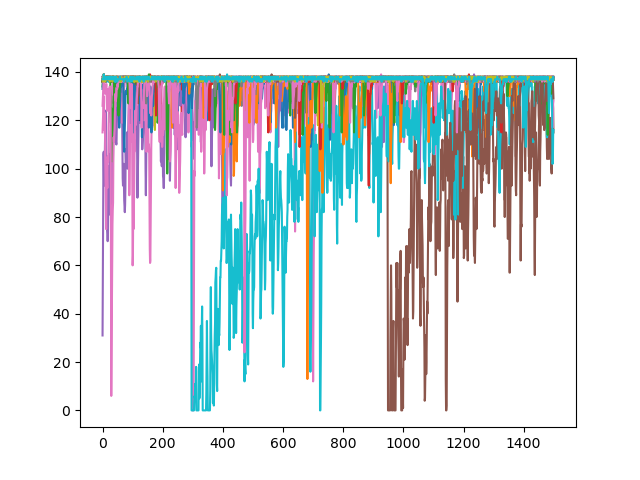

In [31]:
%matplotlib notebook

nPlots = 20
startIndex = 16000


ax = plt.plot(dfPulses[dfPulses.columns[startIndex]])

for i in range(nPlots - 1):
    plt.plot(dfPulses[dfPulses.columns[startIndex + 1 + i]])
    plt.plot()

In [14]:
def singlePulseToArea(singlePulse):
    newPulse = max(singlePulse) - singlePulse
    return sum(newPulse)

In [15]:
dfAreas = pd.DataFrame(columns = ["Co60"])

In [16]:
dfAreas["Co60"] = dfPulses.apply(singlePulseToArea, axis = 0)

In [17]:
dfAreas

Co60
0        3152
1        3310
2       35301
3       14470
4        4463
...       ...
220135   3105
220136   3068
220137   2803
220138   1854
220139   3116

[220140 rows x 1 columns]

In [18]:
dfAreas.to_csv("../PeakDetection_Co60_Areas_2kV_v4_t50.csv")

In [19]:
dfAreasCalibrated = dfAreas*0.04227 - 25.74

<IPython.core.display.Javascript object>


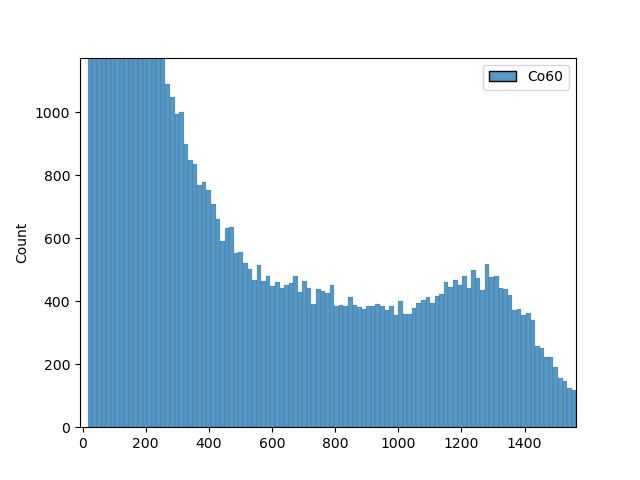

In [32]:
%matplotlib notebook
sns.histplot(dfAreasCalibrated, bins = 500)
plt.show()

In [ ]:
%matplotlib notebook
dfMax = max(dfPulses[dfPulses.columns[0]])
dfNew = dfMax - dfPulses[dfPulses.columns[0]]
plt.plot(dfNew)
plt.show()